## Statistical inference

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.plotting
from datetime import datetime, timedelta, date
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [159]:
data = pd.read_csv(r"C:\Users\HP\Downloads\ee798q_ass\Interpolated Df.csv",index_col = 0, header = 0)
df = pd.DataFrame(data)
df.index = pd.to_datetime(df.index)
df

,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),NO2 (µg/m3),NOX (ppb),CO (mg/m3),SO2 (µg/m3),NH3 (µg/m3),OZONE (µg/m3),BENZENE (µg/m3)
From,,,,,,,,,,
2023-02-01 00:00:00,95.0,35.0,18.1,90.1,56.2,0.310000,8.2,17.7,28.1,0.4
2023-02-01 00:15:00,95.0,35.0,18.1,88.0,55.1,0.330000,8.2,18.3,27.1,0.4
2023-02-01 00:30:00,95.0,35.0,18.1,87.7,55.2,0.380000,8.2,19.7,24.9,0.4
2023-02-01 00:45:00,122.0,34.0,18.1,88.9,55.7,0.380000,8.2,21.3,21.9,0.4
2023-02-01 01:00:00,122.0,34.0,18.1,90.0,55.8,0.380000,8.2,22.3,16.7,0.4
...,...,...,...,...,...,...,...,...,...,...
2023-05-01 22:45:00,19.0,11.0,17.9,100.0,67.8,0.630000,10.0,10.7,26.1,0.1
2023-05-01 23:00:00,19.0,11.0,17.9,100.0,67.7,0.570000,10.0,10.4,30.9,0.1
2023-05-01 23:15:00,19.0,11.0,19.6,100.2,69.2,0.580000,9.9,10.5,29.6,0.1


In [160]:
PM10 = df['PM10 (µg/m3)']
PM25 = df['PM2.5 (µg/m3)']
NO = df['NO (µg/m3)']
NO2 = df['NO2 (µg/m3)']
NOX = df['NOX (ppb)']
CO = df['CO (mg/m3)']
SO2 = df['SO2 (µg/m3)']
NH3 = df['NH3 (µg/m3)']
OZONE = df['OZONE (µg/m3)']
BENZENE = df['BENZENE (µg/m3)']

Typically, the release of pollutants occurs immediately or shortly after the blasting event.However, the concentration and spread of pollutants can be influenced by factors like wind speed, atmospheric stability, and the distance from the blasting site.Hence, we consider the interval of 13:45:00 to 15:45:00 to check if blasting occurs between 13:45:00 to 14:45:00(we allow 1 hour deviation to ensure pollutants are released in the air)

In [161]:
def highest_value(column):
    df['date'] = df.index.date
    df['time'] = df.index.time
    df['value'] = df[column]

    max_values = df.groupby('date')['value'].max()
    max_times = df.groupby(['date', 'value'])['time'].first().reset_index()
    max_data = pd.merge(max_values, max_times, on=['date', 'value'])
    count = 0
    for _, row in max_data.iterrows():
        date = row['date']
        max_value = row['value']
        time = row['time']
        time_str = time.strftime("%H:%M:%S")
        if(time_str == "13:45:00" or time_str == "14:00:00" or time_str == "14:15:00" or time_str == "14:30:00" or time_str == "14:45:00" or time_str == "15:00:00" or time_str == "15:15:00" or time_str == "15:30:00" or time_str == "15:45:00"):
            count += 1
        print(f"On {date}, Highest value of {column} : {max_value}, At time :{time}")
    print("\n")
    print(f"Probability of density of {column} being highest between 13:45:00 to 15:45:00 is = {count}/90")
        

In [74]:
highest_value('PM10 (µg/m3)')

On 2023-02-01, Highest value of PM10 (µg/m3) : 250.0, At time :20:45:00
On 2023-02-02, Highest value of PM10 (µg/m3) : 442.0, At time :19:45:00
On 2023-02-03, Highest value of PM10 (µg/m3) : 276.0, At time :20:45:00
On 2023-02-04, Highest value of PM10 (µg/m3) : 522.0, At time :08:45:00
On 2023-02-05, Highest value of PM10 (µg/m3) : 508.0, At time :22:45:00
On 2023-02-06, Highest value of PM10 (µg/m3) : 554.0, At time :00:45:00
On 2023-02-07, Highest value of PM10 (µg/m3) : 698.0, At time :08:45:00
On 2023-02-08, Highest value of PM10 (µg/m3) : 489.0, At time :23:45:00
On 2023-02-09, Highest value of PM10 (µg/m3) : 796.0, At time :20:45:00
On 2023-02-10, Highest value of PM10 (µg/m3) : 770.0, At time :20:45:00
On 2023-02-11, Highest value of PM10 (µg/m3) : 605.0, At time :00:45:00
On 2023-02-12, Highest value of PM10 (µg/m3) : 169.3901437371663, At time :23:45:00
On 2023-02-13, Highest value of PM10 (µg/m3) : 177.86652977412732, At time :23:45:00
On 2023-02-14, Highest value of PM10 (µ

In [75]:
highest_value('PM2.5 (µg/m3)')

On 2023-02-01, Highest value of PM2.5 (µg/m3) : 68.0, At time :07:45:00
On 2023-02-02, Highest value of PM2.5 (µg/m3) : 120.0, At time :19:45:00
On 2023-02-03, Highest value of PM2.5 (µg/m3) : 100.0, At time :07:45:00
On 2023-02-04, Highest value of PM2.5 (µg/m3) : 306.0, At time :07:45:00
On 2023-02-05, Highest value of PM2.5 (µg/m3) : 158.0, At time :23:45:00
On 2023-02-06, Highest value of PM2.5 (µg/m3) : 158.0, At time :00:00:00
On 2023-02-07, Highest value of PM2.5 (µg/m3) : 339.0, At time :07:45:00
On 2023-02-08, Highest value of PM2.5 (µg/m3) : 223.0, At time :22:45:00
On 2023-02-09, Highest value of PM2.5 (µg/m3) : 257.0, At time :18:45:00
On 2023-02-10, Highest value of PM2.5 (µg/m3) : 281.0, At time :20:45:00
On 2023-02-11, Highest value of PM2.5 (µg/m3) : 203.0, At time :07:45:00
On 2023-02-12, Highest value of PM2.5 (µg/m3) : 71.0, At time :13:45:00
On 2023-02-13, Highest value of PM2.5 (µg/m3) : 69.0, At time :00:45:00
On 2023-02-14, Highest value of PM2.5 (µg/m3) : 76.0, 

In [76]:
highest_value('NO (µg/m3)')

On 2023-02-01, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-02, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-03, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-04, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-05, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-06, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-07, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-08, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-09, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-10, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-11, Highest value of NO (µg/m3) : 18.1, At time :00:00:00
On 2023-02-12, Highest value of NO (µg/m3) : 26.6, At time :22:30:00
On 2023-02-13, Highest value of NO (µg/m3) : 22.4, At time :00:00:00
On 2023-02-14, Highest value of NO (µg/m3) : 16.6, At time :23:45:00
On 2023-02-15, Highest value of NO

In [77]:
highest_value('NO2 (µg/m3)')

On 2023-02-01, Highest value of NO2 (µg/m3) : 93.9, At time :21:15:00
On 2023-02-02, Highest value of NO2 (µg/m3) : 97.0, At time :20:00:00
On 2023-02-03, Highest value of NO2 (µg/m3) : 102.4, At time :21:00:00
On 2023-02-04, Highest value of NO2 (µg/m3) : 96.1, At time :21:15:00
On 2023-02-05, Highest value of NO2 (µg/m3) : 87.87798842324152, At time :15:30:00
On 2023-02-06, Highest value of NO2 (µg/m3) : 84.4, At time :00:30:00
On 2023-02-07, Highest value of NO2 (µg/m3) : 83.1, At time :19:15:00
On 2023-02-08, Highest value of NO2 (µg/m3) : 90.9, At time :09:45:00
On 2023-02-09, Highest value of NO2 (µg/m3) : 85.6, At time :01:00:00
On 2023-02-10, Highest value of NO2 (µg/m3) : 87.5, At time :11:30:00
On 2023-02-11, Highest value of NO2 (µg/m3) : 84.3, At time :09:30:00
On 2023-02-12, Highest value of NO2 (µg/m3) : 83.3, At time :05:30:00
On 2023-02-13, Highest value of NO2 (µg/m3) : 87.1, At time :21:15:00
On 2023-02-14, Highest value of NO2 (µg/m3) : 75.8, At time :22:15:00
On 202

In [78]:
highest_value('NOX (ppb)')

On 2023-02-01, Highest value of NOX (ppb) : 59.5, At time :22:00:00
On 2023-02-02, Highest value of NOX (ppb) : 84.7, At time :22:15:00
On 2023-02-03, Highest value of NOX (ppb) : 74.9, At time :00:00:00
On 2023-02-04, Highest value of NOX (ppb) : 74.9, At time :21:30:00
On 2023-02-05, Highest value of NOX (ppb) : 101.9, At time :23:45:00
On 2023-02-06, Highest value of NOX (ppb) : 106.8, At time :02:00:00
On 2023-02-07, Highest value of NOX (ppb) : 89.2, At time :08:00:00
On 2023-02-08, Highest value of NOX (ppb) : 75.4, At time :05:15:00
On 2023-02-09, Highest value of NOX (ppb) : 87.8, At time :23:45:00
On 2023-02-10, Highest value of NOX (ppb) : 119.9, At time :23:30:00
On 2023-02-11, Highest value of NOX (ppb) : 120.7, At time :00:15:00
On 2023-02-12, Highest value of NOX (ppb) : 52.0, At time :05:30:00
On 2023-02-13, Highest value of NOX (ppb) : 54.0, At time :21:30:00
On 2023-02-14, Highest value of NOX (ppb) : 52.5, At time :22:45:00
On 2023-02-15, Highest value of NOX (ppb) : 

In [79]:
highest_value('CO (mg/m3)')

On 2023-02-01, Highest value of CO (mg/m3) : 1.115000827646372, At time :09:45:00
On 2023-02-02, Highest value of CO (mg/m3) : 2.26, At time :19:00:00
On 2023-02-03, Highest value of CO (mg/m3) : 1.84, At time :10:15:00
On 2023-02-04, Highest value of CO (mg/m3) : 2.34, At time :07:15:00
On 2023-02-05, Highest value of CO (mg/m3) : 2.38, At time :20:45:00
On 2023-02-06, Highest value of CO (mg/m3) : 1.88, At time :21:00:00
On 2023-02-07, Highest value of CO (mg/m3) : 2.26, At time :07:30:00
On 2023-02-08, Highest value of CO (mg/m3) : 1.94, At time :22:45:00
On 2023-02-09, Highest value of CO (mg/m3) : 2.81, At time :22:00:00
On 2023-02-10, Highest value of CO (mg/m3) : 3.82, At time :20:30:00
On 2023-02-11, Highest value of CO (mg/m3) : 2.9, At time :07:45:00
On 2023-02-12, Highest value of CO (mg/m3) : 1.45, At time :10:15:00
On 2023-02-13, Highest value of CO (mg/m3) : 1.25, At time :10:15:00
On 2023-02-14, Highest value of CO (mg/m3) : 1.37, At time :10:15:00
On 2023-02-15, Highest

In [80]:
highest_value('SO2 (µg/m3)')

On 2023-02-01, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-02, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-03, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-04, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-05, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-06, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-07, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-08, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-09, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-10, Highest value of SO2 (µg/m3) : 8.2, At time :00:00:00
On 2023-02-11, Highest value of SO2 (µg/m3) : 26.9, At time :20:45:00
On 2023-02-12, Highest value of SO2 (µg/m3) : 14.4, At time :19:15:00
On 2023-02-13, Highest value of SO2 (µg/m3) : 53.3, At time :21:30:00
On 2023-02-14, Highest value of SO2 (µg/m3) : 49.8, At time :16:30:00
On 2023-02-15, Highest value o

In [81]:
highest_value('NH3 (µg/m3)')

On 2023-02-01, Highest value of NH3 (µg/m3) : 30.3, At time :17:15:00
On 2023-02-02, Highest value of NH3 (µg/m3) : 29.1, At time :11:30:00
On 2023-02-03, Highest value of NH3 (µg/m3) : 31.9, At time :10:30:00
On 2023-02-04, Highest value of NH3 (µg/m3) : 31.6, At time :11:00:00
On 2023-02-05, Highest value of NH3 (µg/m3) : 33.6, At time :15:15:00
On 2023-02-06, Highest value of NH3 (µg/m3) : 62.4, At time :13:00:00
On 2023-02-07, Highest value of NH3 (µg/m3) : 26.9, At time :10:30:00
On 2023-02-08, Highest value of NH3 (µg/m3) : 27.4, At time :10:00:00
On 2023-02-09, Highest value of NH3 (µg/m3) : 29.0, At time :11:15:00
On 2023-02-10, Highest value of NH3 (µg/m3) : 31.2, At time :15:15:00
On 2023-02-11, Highest value of NH3 (µg/m3) : 32.4, At time :10:45:00
On 2023-02-12, Highest value of NH3 (µg/m3) : 37.3, At time :18:15:00
On 2023-02-13, Highest value of NH3 (µg/m3) : 37.8, At time :11:15:00
On 2023-02-14, Highest value of NH3 (µg/m3) : 51.8, At time :16:45:00
On 2023-02-15, Highe

In [82]:
highest_value('OZONE (µg/m3)')

On 2023-02-01, Highest value of OZONE (µg/m3) : 59.8, At time :13:00:00
On 2023-02-02, Highest value of OZONE (µg/m3) : 55.8, At time :15:45:00
On 2023-02-03, Highest value of OZONE (µg/m3) : 61.7, At time :13:30:00
On 2023-02-04, Highest value of OZONE (µg/m3) : 66.0, At time :16:00:00
On 2023-02-05, Highest value of OZONE (µg/m3) : 64.5, At time :11:15:00
On 2023-02-06, Highest value of OZONE (µg/m3) : 61.1, At time :12:30:00
On 2023-02-07, Highest value of OZONE (µg/m3) : 67.6, At time :16:45:00
On 2023-02-08, Highest value of OZONE (µg/m3) : 63.9, At time :13:45:00
On 2023-02-09, Highest value of OZONE (µg/m3) : 61.2, At time :15:45:00
On 2023-02-10, Highest value of OZONE (µg/m3) : 74.0, At time :12:00:00
On 2023-02-11, Highest value of OZONE (µg/m3) : 69.5, At time :16:30:00
On 2023-02-12, Highest value of OZONE (µg/m3) : 64.3, At time :10:30:00
On 2023-02-13, Highest value of OZONE (µg/m3) : 74.8, At time :14:45:00
On 2023-02-14, Highest value of OZONE (µg/m3) : 67.9, At time :1

In [83]:
highest_value('BENZENE (µg/m3)')

On 2023-02-01, Highest value of BENZENE (µg/m3) : 0.4, At time :00:00:00
On 2023-02-02, Highest value of BENZENE (µg/m3) : 0.2, At time :19:15:00
On 2023-02-03, Highest value of BENZENE (µg/m3) : 0.2, At time :00:00:00
On 2023-02-04, Highest value of BENZENE (µg/m3) : 0.3, At time :07:00:00
On 2023-02-05, Highest value of BENZENE (µg/m3) : 0.3, At time :00:30:00
On 2023-02-06, Highest value of BENZENE (µg/m3) : 0.3, At time :00:00:00
On 2023-02-07, Highest value of BENZENE (µg/m3) : 0.4, At time :08:00:00
On 2023-02-08, Highest value of BENZENE (µg/m3) : 0.6, At time :23:45:00
On 2023-02-09, Highest value of BENZENE (µg/m3) : 0.6, At time :00:00:00
On 2023-02-10, Highest value of BENZENE (µg/m3) : 0.4, At time :00:00:00
On 2023-02-11, Highest value of BENZENE (µg/m3) : 0.4, At time :00:00:00
On 2023-02-12, Highest value of BENZENE (µg/m3) : 0.1, At time :00:00:00
On 2023-02-13, Highest value of BENZENE (µg/m3) : 0.2, At time :00:45:00
On 2023-02-14, Highest value of BENZENE (µg/m3) : 0

Probability of density of all the pollutants being highest between 13:45:00 to 15:45:00 is either zero or very low, which suggests that blasting is not likely to occur between this time interval, but we will still check by finding combined pllution.

## Combined Data of Pollution

To assign weights to the pollutants, we will consider their importance and concentration of emission.
In open pit blasting, the main air pollutant is Particulate matter (PM10 and PM2.5) therefore, we will assign the highest weights to them.

After PM, we will assign second highest weight to NO, NO2, NOX, CO, SO2, NH3 as they are of equal importance.

Ozone and Benzene are not typically released directly during open pit blasting, they are secondary pollutants formed in the atmosphere through chemical reactions involving nitrogen oxides (NOx) and volatile organic compounds (VOCs) in the presence of sunlight.Benzene is itself a VOC. Therefore, we assign the least weights to Ozone and Benzene.

In [162]:
weights = {
    'PM10 (µg/m3)': 2/15,
    'PM2.5 (µg/m3)': 2/15,
    'NO (µg/m3)': 1.5/15,
    'NO2 (µg/m3)': 1.5/15,
    'NOX (ppb)': 1.5/15,
    'CO (mg/m3)': 1.5/15,
    'SO2 (µg/m3)': 1.5/15,
    'NH3 (µg/m3)': 1.5/15,
    'OZONE (µg/m3)': 1/15,
    'BENZENE (µg/m3)': 1/15
}
df['combined_pollution']=0
# Calculate the weighted combination (converting all to µg/m3))
df['combined_pollution'] =  (PM10*weights['PM10 (µg/m3)'] + PM25*weights['PM2.5 (µg/m3)'] + NO*weights['NO (µg/m3)'] + NO2*weights['NO2 (µg/m3)'] + ((NOX*weights['NOX (ppb)']*46.01)/24.45) + (CO*weights['CO (mg/m3)']*1000) + SO2*weights['SO2 (µg/m3)'] + NH3*weights['NH3 (µg/m3)'] + OZONE*weights['OZONE (µg/m3)'] + BENZENE*weights['BENZENE (µg/m3)'])
df['combined_pollution']

From
2023-02-01 00:00:00     74.219047
2023-02-01 00:15:00     75.795382
2023-02-01 00:30:00     80.777534
2023-02-01 00:45:00     84.418290
2023-02-01 01:00:00     84.300442
                          ...    
2023-05-01 22:45:00     95.365268
2023-05-01 23:00:00     89.636450
2023-05-01 23:15:00     91.022053
2023-05-01 23:30:00     91.346900
2023-05-01 23:45:00    117.496171
Name: combined_pollution, Length: 8640, dtype: float64

Combined Pollution is in (µg/m3)

<IPython.core.display.Javascript object>


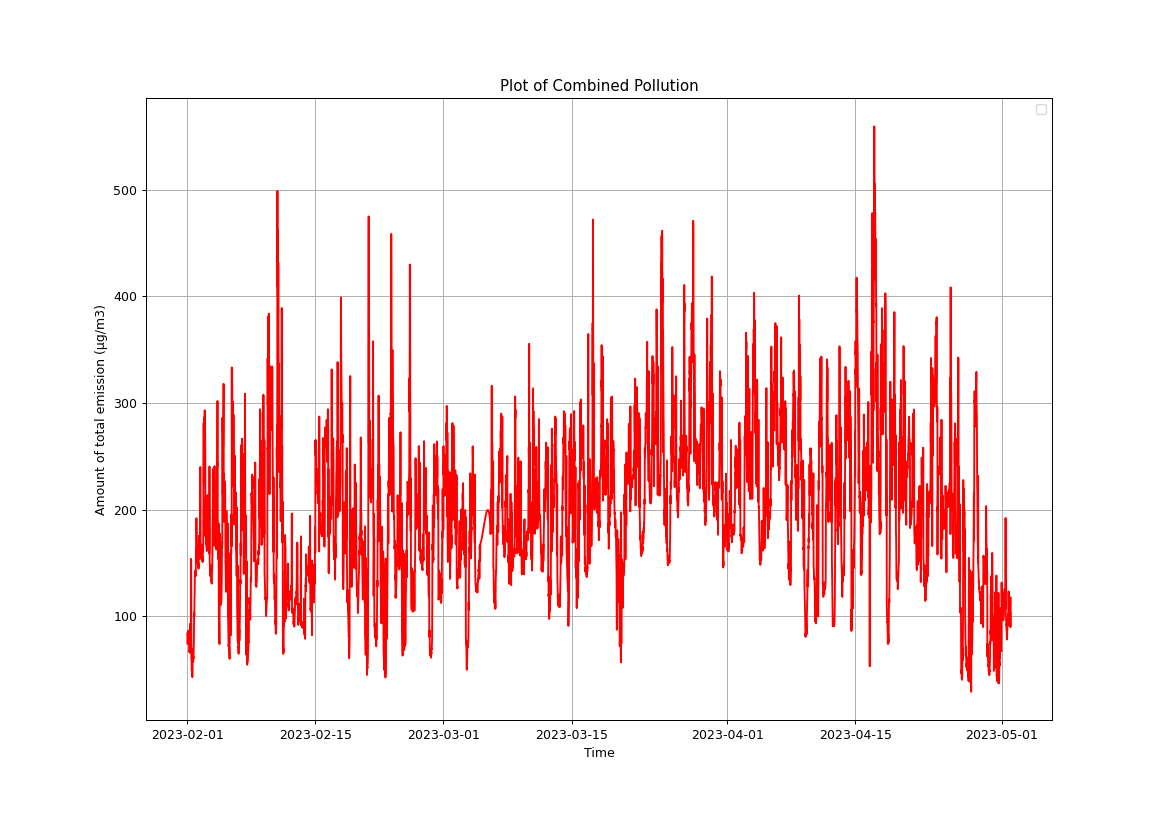

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [166]:
%matplotlib notebook
plt.plot(df.index, df['combined_pollution'], color ='r')
plt.xlabel('Time')
plt.ylabel('Amount of total emission (µg/m3)')
plt.title('Plot of Combined Pollution')
plt.grid()
plt.legend()

In [164]:
highest_value('combined_pollution')

On 2023-02-01, Highest value of combined_pollution : 165.57936969378926, At time :23:45:00
On 2023-02-02, Highest value of combined_pollution : 293.1613006134969, At time :21:45:00
On 2023-02-03, Highest value of combined_pollution : 240.8159059304704, At time :23:30:00
On 2023-02-04, Highest value of combined_pollution : 318.0295010224949, At time :23:15:00
On 2023-02-05, Highest value of combined_pollution : 333.36179141104293, At time :20:45:00
On 2023-02-06, Highest value of combined_pollution : 289.25556237218814, At time :01:15:00
On 2023-02-07, Highest value of combined_pollution : 308.699599182004, At time :07:30:00
On 2023-02-08, Highest value of combined_pollution : 294.12961554192225, At time :22:45:00
On 2023-02-09, Highest value of combined_pollution : 383.82056441717793, At time :22:00:00
On 2023-02-10, Highest value of combined_pollution : 499.04352147239257, At time :20:30:00
On 2023-02-11, Highest value of combined_pollution : 389.14494478527604, At time :07:45:00
On 2

These are the blast trigger times of each day(when tha combined pollution is the highest)

Probabilty being zero suggests that blasting is not likely to occur between 13:45:00 to 15:45:00.

## Histogram of blast trigger times of each day

In [124]:
df['date'] = df.index.date
df['time'] = df.index.time
df['value'] = df['combined_pollution']

max_values = df.groupby('date')['value'].max()
max_times = df.groupby(['date', 'value'])['time'].first().reset_index()
max_data = pd.merge(max_values, max_times, on=['date', 'value'])
max_t_arr = []
for _, row in max_data.iterrows():
    time = row['time']
    max_t_arr.append(time)
max_t_arr[0]

datetime.time(23, 45)

In [125]:
start_date = date(2023, 2, 1)
end_date = date(2023, 5, 1)

date_array = []
current_date = start_date

while current_date <= end_date:
    date_array.append(current_date)
    current_date += timedelta(days=1)
date_array[1]

datetime.date(2023, 2, 2)

<IPython.core.display.Javascript object>


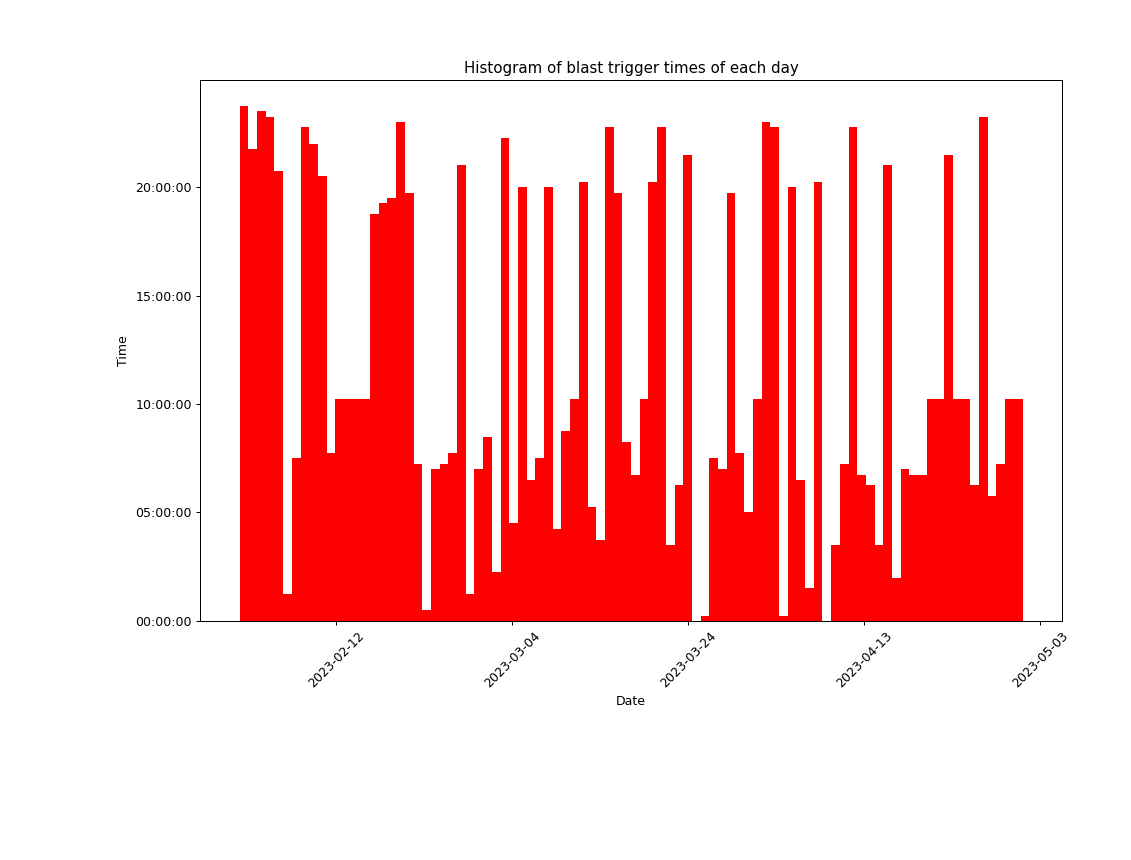

C:\Users\HP\AppData\Local\Temp\ipykernel_23008\4081340067.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [126]:
dates = date_array
times = max_t_arr
time_values = [t.hour + t.minute / 60 + t.second / 3600 for t in times]
mpl_dates = mdates.date2num(dates)
fig, ax = plt.subplots()
ax.hist(mpl_dates, bins = 90, weights = time_values, color = "red")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
time_s = ["00:00:00","05:00:00","10:00:00","15:00:00","20:00:00",]
# ax.yaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.set_yticklabels(time_s)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Time')
plt.title('Histogram of blast trigger times of each day')
plt.tight_layout()
plt.show()

Taking out a common blasting time for the whole 3 month data:

In [31]:
df['date'] = df.index.date
df['time'] = df.index.time
df['value'] = df['combined_pollution']

max_values = df.groupby('date')['value'].max()
max_times = df.groupby(['date', 'value'])['time'].first().reset_index()
max_data = pd.merge(max_values, max_times, on=['date', 'value'])
count = np.zeros(96)
for _, row in max_data.iterrows():
    date = row['date']
    max_value = row['value']
    time = row['time']
    time_str = time.strftime("%H:%M:%S")
    start="00:00:00"
    end = "02:00:00"
    i=0
    while(i != 96):
        if(time_str >= start and time_str <= end ):
            count[i] += 1
        t1 = datetime.strptime(start, "%H:%M:%S").time()
        t2 = datetime.strptime(end, "%H:%M:%S").time()
        new_t1 = datetime.combine(datetime.today(), t1) + timedelta(minutes=15)
        new_t2 = datetime.combine(datetime.today(), t2) + timedelta(minutes=15)
        start = str(new_t1.time())
        end = str(new_t2.time())
        i += 1
count

array([ 9.,  8.,  6.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,
        8.,  8.,  6.,  5.,  8.,  9., 12., 16., 19., 21., 24., 23., 24.,
       22., 21., 17., 13.,  9.,  6.,  3., 16., 15., 14., 13., 13., 13.,
       13., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  2.,  3.,  6.,  9., 12., 13., 14., 15., 15.,
       16., 16., 14., 12.,  9., 13., 14., 14., 15., 14.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

The maximum is 24 which corresponds to the interval 05:45:00 to 07:45:00 and 06:15:00 to 08:15:00.(that is there are 24 days on which the pollution is highest between 05:45:00 to 07:45:00 and 6:15:00 to 07:15:00. Also,there are 23 days on which the pollution is highest between 06:00:00 to 08:00:00). Our desired interval is 05:45:00 to 08:15:00.

We take one hour deviation so as to ensure that pollutants are completely released in air and their concentration change is significant.Hence, blasting would have occured 1 hour before the closing interval.

Therefore, the blasting time interval according to our combined data is 05:45:00 to 07:15:00.(which does not match the given blasting time)

## Plotting Histogram of our blast trigger times(05:45:00 to 07:15:00)

In [39]:
df.index[29]

Timestamp('2023-02-01 07:15:00')

In [45]:
from datetime import datetime
timestamp_list1 = pd.date_range(df.index[23], periods=90).tolist()
timestamp_list2 = pd.date_range(df.index[24], periods=90).tolist()
timestamp_list3 = pd.date_range(df.index[25], periods=90).tolist()
timestamp_list4 = pd.date_range(df.index[26], periods=90).tolist()
timestamp_list5 = pd.date_range(df.index[27], periods=90).tolist()
timestamp_list6 = pd.date_range(df.index[28], periods=90).tolist()
# timestamp_list7 = pd.date_range(df.index[29], periods=90).tolist()

timestamp_list = timestamp_list1 + timestamp_list2 + timestamp_list3 + timestamp_list4 + timestamp_list5 + timestamp_list6  
timestamp_list.sort()
datetime_list = df.index.tolist()
remaining_list = [x for x in datetime_list if x not in timestamp_list]
remaining_list
value = df['combined_pollution']
ts_df = pd.DataFrame(value)
ts_df.columns = ['combined pollution']
ts_df['combined pollution'][remaining_list] = 0
ts_df['combined pollution']

From
2023-02-01 00:00:00    0.0
2023-02-01 00:15:00    0.0
2023-02-01 00:30:00    0.0
2023-02-01 00:45:00    0.0
2023-02-01 01:00:00    0.0
                      ... 
2023-05-01 22:45:00    0.0
2023-05-01 23:00:00    0.0
2023-05-01 23:15:00    0.0
2023-05-01 23:30:00    0.0
2023-05-01 23:45:00    0.0
Name: combined pollution, Length: 8640, dtype: float64

In [46]:
ts_df['combined pollution'][24]

66.36351329243355

<IPython.core.display.Javascript object>


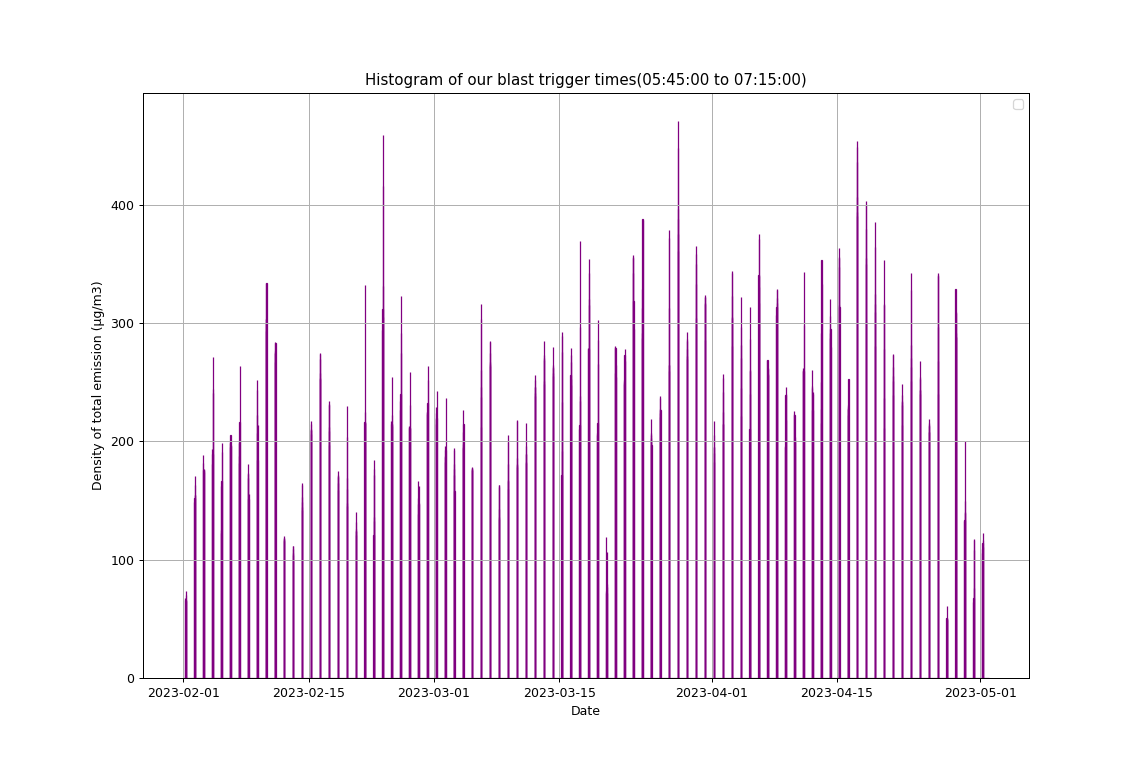

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [146]:
%matplotlib notebook
plt.hist(ts_df.index, bins=8640, weights = ts_df['combined pollution'], edgecolor = 'purple')
plt.xlabel('Date')
plt.ylabel('Density of total emission (µg/m3)')
plt.title('Histogram of our blast trigger times(05:45:00 to 07:15:00)')
plt.grid()
plt.legend()

Each bin corresponds to data between 05:45:00 to 07:15:00 of each day.

## Probability of open-pit blast happening during 14:15 to 14:30

In [134]:
df['date'] = df.index.date
df['time'] = df.index.time
df['value'] = df['combined_pollution']

max_values = df.groupby('date')['value'].max()
max_times = df.groupby(['date', 'value'])['time'].first().reset_index()
max_data = pd.merge(max_values, max_times, on=['date', 'value'])
count = np.zeros(96)
for _, row in max_data.iterrows():
    date = row['date']
    max_value = row['value']
    time = row['time']
    time_str = time.strftime("%H:%M:%S")
    start="00:00:00"
    end = "01:15:00"
    i=0
    while(i != 96):
        if(time_str >= start and time_str <= end ):
            count[i] += 1
        t1 = datetime.strptime(start, "%H:%M:%S").time()
        t2 = datetime.strptime(end, "%H:%M:%S").time()
        new_t1 = datetime.combine(datetime.today(), t1) + timedelta(minutes=15)
        new_t2 = datetime.combine(datetime.today(), t2) + timedelta(minutes=15)
        start = str(new_t1.time())
        end = str(new_t2.time())
        i += 1
count

array([ 7.,  6.,  4.,  4.,  5.,  5.,  3.,  2.,  2.,  4.,  4.,  4.,  5.,
        6.,  6.,  4.,  4.,  4.,  4.,  3.,  6.,  7., 10., 14., 17., 20.,
       20., 18., 15., 12.,  9.,  6.,  3.,  3.,  2.,  1., 13., 13., 13.,
       13., 13., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  3.,  6.,  9., 11., 12.,
       12., 13., 10.,  9.,  7.,  7.,  7.,  5., 10., 10., 11., 11., 11.,
        0.,  0.,  0.,  0.,  0.])

In [135]:
sum(count)

495.0

Probability of open-pit blast happening during 14:15 to 14:30 = 0 (according to our combined pollution information)

## QQ Plot

<IPython.core.display.Javascript object>


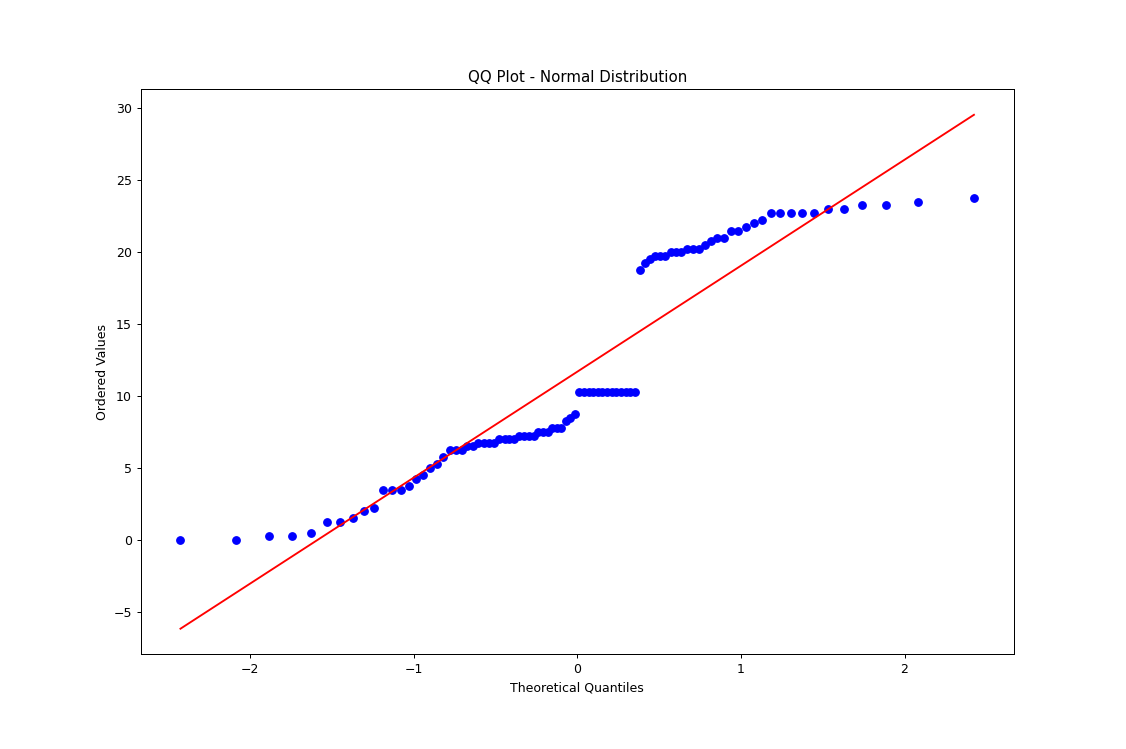

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

time = time_values
fig, ax = plt.subplots()
stats.probplot(time, dist="norm", plot=ax)
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Ordered Values")
ax.set_title("QQ Plot - Normal Distribution")
plt.show()

Therefore, the QQ plot does not follow Normal Distribution.

<IPython.core.display.Javascript object>


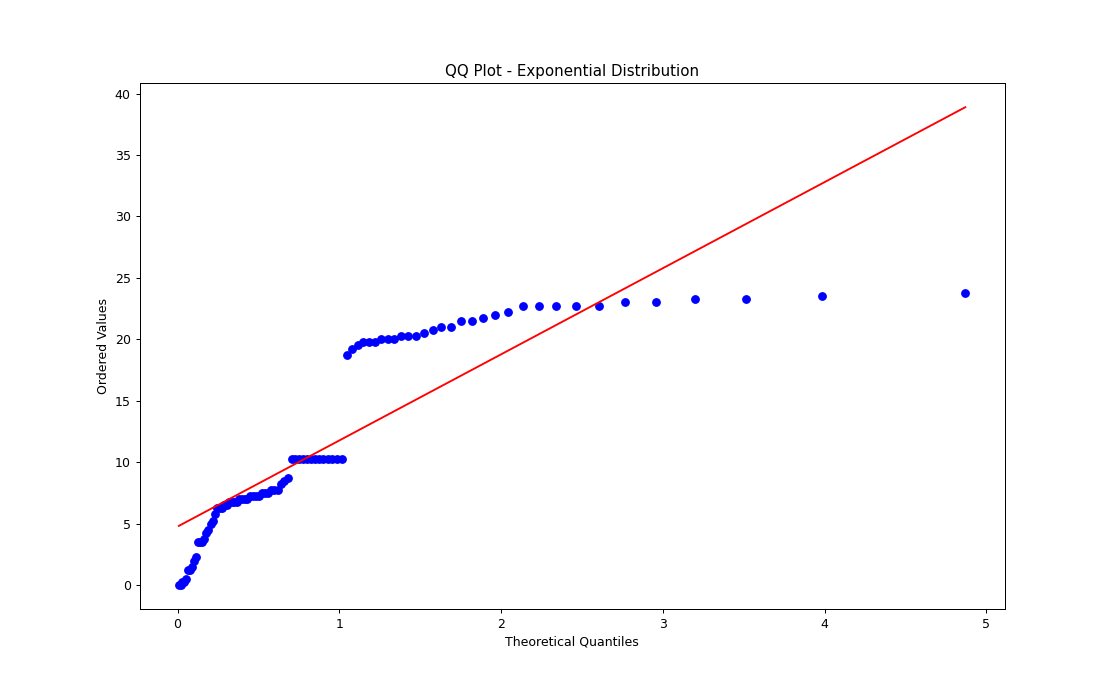

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

time = time_values
fig, ax = plt.subplots()
stats.probplot(time, dist="expon", plot=ax)
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Ordered Values")
ax.set_title("QQ Plot - Exponential Distribution")
plt.show()

Therefore, the QQ plot does not follow Exponential Distribution.

<IPython.core.display.Javascript object>


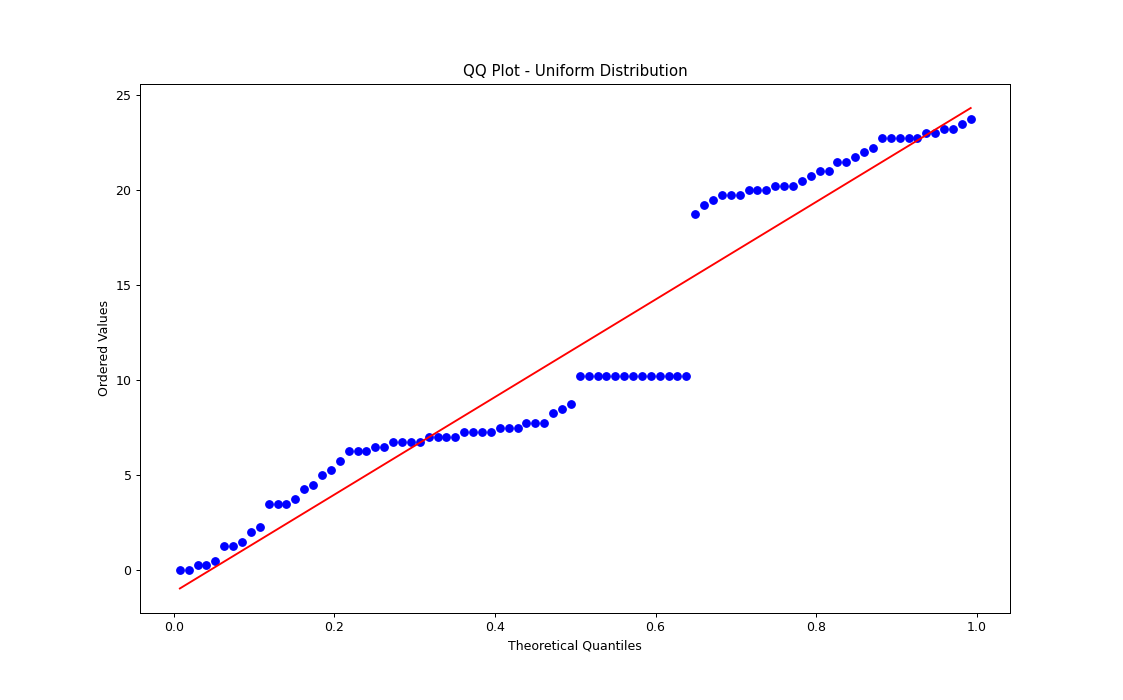

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

time = time_values
fig, ax = plt.subplots()
stats.probplot(time, dist="uniform", plot=ax)
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Ordered Values")
ax.set_title("QQ Plot - Uniform Distribution")
plt.show()

Uniform distribution is the closest fit till now.